# Nareg Najarian, ID: A09185210

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score,\
    GridSearchCV
from sklearn.datasets import make_regression, make_classification, make_moons,\
    make_gaussian_quantiles
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
    classification_report, confusion_matrix, plot_confusion_matrix,\
    roc_curve, auc, precision_recall_curve
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier,\
    GradientBoostingRegressor, GradientBoostingClassifier,\
    AdaBoostRegressor, AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR, SVC 
from sklearn.calibration import CalibratedClassifierCV

# Problem 1 Regression

In [2]:
X, y = make_regression(n_samples = 1000, n_features = 7, n_informative = 3, noise = 10, random_state = 10)
print("X has shapes: %s, y has shape: %s" % (X.shape, y.shape))

X has shapes: (1000, 7), y has shape: (1000,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 10)
print("Train feature set shape: %s, Test feature set shape: %s " % (X_train.shape, X_test.shape))
print("Train set labels shape: %s, Test set labels shape: %s " % (y_train.shape, y_test.shape))

Train feature set shape: (600, 7), Test feature set shape: (400, 7) 
Train set labels shape: (600,), Test set labels shape: (400,) 


## 1.1 DecisionTree

In [4]:
max_leafs = np.arange(15,31)
scores = []

for leaf in max_leafs:
    mod_dt = DecisionTreeRegressor(max_leaf_nodes = leaf, random_state = 10)
    cvs = cross_val_score(mod_dt, X_train, y_train, cv = 3)
    score = np.mean(cvs)
    scores.append(score)
    print("depth: %s, score: %s" % (leaf, score))

depth: 15, score: 0.9564657955626453
depth: 16, score: 0.9538549492399265
depth: 17, score: 0.9545136375448355
depth: 18, score: 0.9553524236810317
depth: 19, score: 0.955372220484476
depth: 20, score: 0.955788976596557
depth: 21, score: 0.9567970009182177
depth: 22, score: 0.9572971758684631
depth: 23, score: 0.9567887108816464
depth: 24, score: 0.9570293417356686
depth: 25, score: 0.957614993363995
depth: 26, score: 0.9575881441876687
depth: 27, score: 0.9568920665831073
depth: 28, score: 0.9563753007583046
depth: 29, score: 0.956765295474229
depth: 30, score: 0.9566712661920956


In [5]:
max_index = np.argmax(scores)
optimal_max_leaf = max_leafs[max_index]
print("optimal max leaf: ", optimal_max_leaf)

optimal max leaf:  25


In [6]:
Reg_A = DecisionTreeRegressor(max_leaf_nodes = optimal_max_leaf, random_state=10)
Reg_A.fit(X_train, y_train)

y_train_predict = Reg_A.predict(X_train)
y_test_predict = Reg_A.predict(X_test)

In [7]:
print("Model Score on X_train: %s" % round(Reg_A.score(X_train,y_train), 4))
print("Model Score on X_test: %s" % round(Reg_A.score(X_test,y_test), 4))

Model Score on X_train: 0.9795
Model Score on X_test: 0.9692


### The optimal value of max_leaf_nodes is 25, the score of Reg_A on train set is 0.9795 and on test set is 0.9692

## 1.2 RandomForest

In [8]:
param_grid = {'n_estimators' : [10, 50, 100, 200, 500, 1000, 1500, 2000], 'max_features': [1,2,3,4]}
mod_rf = RandomForestRegressor(random_state = 10)
Reg_B = GridSearchCV(mod_rf, param_grid = param_grid, cv = 3)
Reg_B.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=10,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [9]:
Reg_B.best_params_

{'max_features': 4, 'n_estimators': 500}

In [10]:
print("Model Score on X_train: %s" % round(Reg_B.best_estimator_.score(X_train,y_train), 4))
print("Model Score on X_test: %s" % round(Reg_B.best_estimator_.score(X_test,y_test), 4))

Model Score on X_train: 0.9959
Model Score on X_test: 0.9729


### The optimal value of max_features is 4 and of n_estimators is 500, the score of Reg_B on train set is 0.9959 and on test set is 0.9729

## 1.3 AdaBoost

In [11]:
param_grid = {'n_estimators' : [10, 50, 100, 200, 500, 1000, 1500, 2000], 'base_estimator__max_depth': [1,2,3]}
mod_ab = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(), random_state = 10)
Reg_C = GridSearchCV(mod_ab, param_grid = param_grid, cv = 3)
Reg_C.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                              criterion='mse',
                                                                              max_depth=None,
                                                                              max_features=None,
                                                                              max_leaf_nodes=None,
                                                                              min_impurity_decrease=0.0,
                                                                              min_impurity_split=None,
                                                                              min_samples_leaf=1,
                                                                              min_samples_split=2,
                                                                              min

In [12]:
Reg_C.best_params_

{'base_estimator__max_depth': 3, 'n_estimators': 50}

In [13]:
print("Model Score on X_train: %s" % round(Reg_C.best_estimator_.score(X_train,y_train), 4))
print("Model Score on X_test: %s" % round(Reg_C.best_estimator_.score(X_test,y_test), 4))

Model Score on X_train: 0.9773
Model Score on X_test: 0.9675


### The optimal value of max_depth is 3 and of n_estimators is 50, the score of Reg_C on train set is 0.9773 and on test set is 0.9675

## 1.4 Comparison of Test Results
### test_score_B = 0.9729 > test_score_A = 0.9692 > test_score_C = 09675.
### The best model is Reg_B followed by Reg_A, then by Reg_C. in other words RandomForest is the best, then comes DecisionTree, and finally AdaBoost.
### Reg_B has a very high train_score = 0.9959 which is good and kind of worrying at the same time. However, all test scores are quite high, all models have very good performance on train and test data, therefore I conclude that none of the models overfit the train data.

# Problem 2 Classification by SVC

In [14]:
X, y = make_gaussian_quantiles(n_samples = 1000, n_features = 12,\
                               n_classes = 2, random_state = 10)
print("X has shapes: %s, y has shape: %s" % (X.shape, y.shape))

X has shapes: (1000, 12), y has shape: (1000,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
print("Train feature set shape: %s, Test feature set shape: %s " % (X_train.shape, X_test.shape))
print("Train set labels shape: %s, Test set labels shape: %s " % (y_train.shape, y_test.shape))

Train feature set shape: (700, 12), Test feature set shape: (300, 12) 
Train set labels shape: (700,), Test set labels shape: (300,) 


## 2.1 poly

In [20]:
param_grid = {'degree' : np.array([1,2,3,4]), 'C' : np.linspace(0.1, 100, 10)}
mod_svc = SVC(kernel = "poly", probability = True, random_state=10)
Class_A = GridSearchCV(mod_svc, param_grid = param_grid, cv = 3)
Class_A.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=True, random_state=10, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([  0.1,  11.2,  22.3,  33.4,  44.5,  55.6,  66.7,  77.8,  88.9,
       100. ]),
                         'degree': array([1, 2, 3, 4])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [21]:
Class_A.best_params_

{'C': 22.300000000000004, 'degree': 2}

In [22]:
print("Model Score on X_train: %s" % round(Class_A.best_estimator_.score(X_train,y_train), 4))
print("Model Score on X_test: %s" % round(Class_A.best_estimator_.score(X_test,y_test), 4))

Model Score on X_train: 0.9857
Model Score on X_test: 0.9533


In [23]:
y_train_predict = Class_A.best_estimator_.predict(X_train)
print(accuracy_score(y_train, y_train_predict))
y_test_predict = Class_A.best_estimator_.predict(X_test)
print(accuracy_score(y_test, y_test_predict))

y_test_predict_proba = Class_A.predict_proba(X_test)

0.9857142857142858
0.9533333333333334


### The optimal value of C is 22.3 and of degree is 2, the accuracy_score of Class_A on train set is 0.9857 and on test set is 0.9533

In [24]:
fpr0_test, tpr0_test, thresholds0_test = roc_curve(y_test, y_test_predict_proba[:,0], pos_label = 0) 
print("ROC: AUC Class 0: ", auc(fpr0_test, tpr0_test))

fpr1_test, tpr1_test, thresholds1_test = roc_curve(y_test, y_test_predict_proba[:,1], pos_label = 1) 
print("ROC: AUC Class 1: ", auc(fpr1_test, tpr1_test))

p0_test, r0_test, thresholds0_test = precision_recall_curve(y_test, y_test_predict_proba[:,0], pos_label = 0)
print("Precision-Recall: AUC Class 0:", auc(r0_test, p0_test))

p1_test, r1_test, thresholds1_test = precision_recall_curve(y_test, y_test_predict_proba[:,1], pos_label = 1)
print("Precision-Recall: AUC Class 1:", auc(r1_test, p1_test))


ROC: AUC Class 0:  0.9922191098661686
ROC: AUC Class 1:  0.9922191098661687
Precision-Recall: AUC Class 0: 0.9927528481249008
Precision-Recall: AUC Class 1: 0.9922464968760252


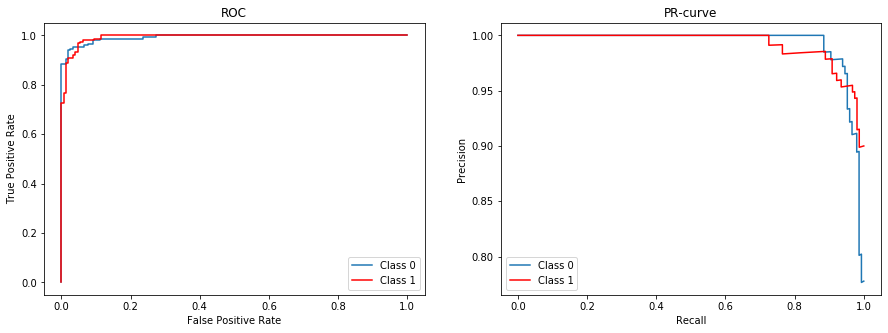

In [25]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(fpr0_test, tpr0_test, "-", label = "Class 0")
plt.plot(fpr1_test, tpr1_test, "-", color = 'r', label = "Class 1")
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(1,2,2)
plt.plot(r0_test, p0_test, "-", label = "Class 0")
plt.plot(r1_test, p1_test, "-", color = 'r', label = "Class 1")
plt.title("PR-curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

plt.show()

## 2.2 rbf

In [26]:
param_grid = {'gamma' : np.linspace(0.0001, 1, 100), 'C' : np.linspace(0.1, 100, 10)}
mod_svc = SVC(kernel = "rbf", probability = True, random_state=10)
Class_B = GridSearchCV(mod_svc, param_grid = param_grid, cv = 3)
Class_B.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=10, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([  0.1,  11.2,  22.3,  33.4,  44.5,  55.6,  66.7...
       7.273e-01, 7.374e-01, 7.475e-01, 7.576e-01, 7.677e-01, 7.778e-01,
       7.879e-01, 7.980e-01, 8.081e-01, 8.182e-01, 8.283e-01, 8.384e-01,
       8.485e-01, 8.586e-01, 8.687e-01, 8.788e-01, 8.889e-01, 8.990e-01,
       9.091e-01, 9.192e-01, 9.293e-01, 9.394e-01, 9.495e-01, 9.596e-01,
       9.697e-01, 9.798e-01, 9.899e-01, 1.000e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

In [27]:
Class_B.best_params_

{'C': 22.300000000000004, 'gamma': 0.0405}

In [28]:
print("Model Score on X_train: %s" % round(Class_B.best_estimator_.score(X_train,y_train), 4))
print("Model Score on X_test: %s" % round(Class_B.best_estimator_.score(X_test,y_test), 4))

Model Score on X_train: 1.0
Model Score on X_test: 0.9567


In [29]:
y_train_predict = Class_B.best_estimator_.predict(X_train)
print(accuracy_score(y_train, y_train_predict))
y_test_predict = Class_B.best_estimator_.predict(X_test)
print(accuracy_score(y_test, y_test_predict))

y_test_predict_proba = Class_B.predict_proba(X_test)

1.0
0.9566666666666667


### The optimal value of C is 22.3 and of gamma is 0.0405, the accuracy_score of Class_B on train set is 1.0 and on test set is 0.9567

In [30]:
fpr0_test, tpr0_test, thresholds0_test = roc_curve(y_test, y_test_predict_proba[:,0], pos_label = 0) 
print("ROC: AUC Class 0: ", auc(fpr0_test, tpr0_test))

fpr1_test, tpr1_test, thresholds1_test = roc_curve(y_test, y_test_predict_proba[:,1], pos_label = 1) 
print("ROC: AUC Class 1: ", auc(fpr1_test, tpr1_test))

p0_test, r0_test, thresholds0_test = precision_recall_curve(y_test, y_test_predict_proba[:,0], pos_label = 0)
print("Precision-Recall: AUC Class 0:", auc(r0_test, p0_test))

p1_test, r1_test, thresholds1_test = precision_recall_curve(y_test, y_test_predict_proba[:,1], pos_label = 1)
print("Precision-Recall: AUC Class 1:", auc(r1_test, p1_test))


ROC: AUC Class 0:  0.9931528166822284
ROC: AUC Class 1:  0.9931528166822284
Precision-Recall: AUC Class 0: 0.9931904603963498
Precision-Recall: AUC Class 1: 0.9935269803518492


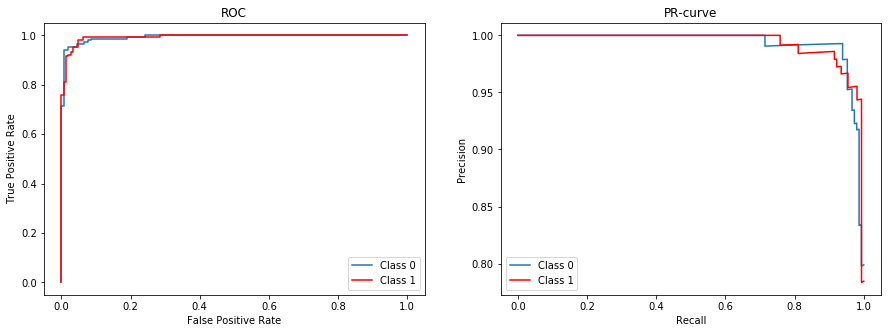

In [31]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(fpr0_test, tpr0_test, "-", label = "Class 0")
plt.plot(fpr1_test, tpr1_test, "-", color = 'r', label = "Class 1")
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(1,2,2)
plt.plot(r0_test, p0_test, "-", label = "Class 0")
plt.plot(r1_test, p1_test, "-", color = 'r', label = "Class 1")
plt.title("PR-curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

plt.show()

## 2.3 Comparison of Test Results

### a) accuracy_score
### score_A = 0.9533 < score_B = 0.9567.
### Class_B has a better accuracy score.

### b) ROC: AUC 
##### Class 0: ___ A: 0.9922191098661686 < B: 0.9931528166822284
##### Class 1: ___ A: 0.9922191098661687 < B: 0.9931528166822284

### We observe that both ROC:AUC results of Class_B are better than Class_A. Although it is small difference, however, Class_B outperforms Class_A with a slight advantage.


### c) P_R: AUC
##### Class 0: ___ A: 0.9927528481249008 < B: 0.9931904603963498
##### Class 1: ___ A: 0.9922464968760252 < B: 0.9935269803518492

### We observe that both P_R:AUC results of Class_B are better than Class_A. Although it is small difference, however, Class_B outperforms Class_A with a slight advantage.

### c) Train Data Overfit
### Class_A has a train_accuracy_score=0.9857, which is fine. 
### Class_B has a train_accuracy_score=1.0 and clearly overfits the train data. However, despite that fact, it still has a very high test_accuracy_score = 0.9567, and it outperforms Class_A.